# KNN MODEL

# Import the required the package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [4]:
df = pd.read_csv('C:\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape


(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Handle the Missing values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Treating the Null Value

In [13]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [14]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [15]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling Categorical Values

In [18]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)


In [22]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [25]:
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)

In [26]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [28]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [29]:
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)

In [30]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [31]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [32]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [33]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [34]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [35]:
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


# Balancing The Dataset

In [37]:
smote = SMOTETomek(0.90)

In [38]:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [39]:
x_bal,y_bal = smote.fit_resample(x,y)

In [40]:
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    359
0    316
Name: Loan_Status, dtype: int64


# Scaling The Data

In [41]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [42]:
x_bal = pd.DataFrame(x_bal)

In [43]:
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.759562,0.555103,-1.145270,-0.697257,0.591608,-0.334703,0.098281,-0.552110,-0.288509,0.275158,0.598455,1.303073
1,-1.753829,0.555103,0.873156,0.350958,0.591608,-0.334703,-0.119622,0.022418,-0.186080,0.275158,0.598455,-1.257551
2,-1.748097,0.555103,0.873156,-0.697257,0.591608,2.987720,-0.392087,-0.552110,-0.979906,0.275158,0.598455,1.303073
3,-1.742364,0.555103,0.873156,-0.697257,-1.690309,-0.334703,-0.463860,0.346257,-0.288509,0.275158,0.598455,1.303073
4,-1.736631,0.555103,-1.145270,-0.697257,0.591608,-0.334703,0.124271,-0.552110,-0.019632,0.275158,0.598455,1.303073


# Splitting Data Into Train And Test

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.2, random_state = 42)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(540, 12)
(540,)
(135, 12)
(135,)


# k-nearest neighbor algorithm

In [46]:
model = KNeighborsClassifier()

In [47]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_pred1=model.predict(x_train)

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(x_test))

[1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0]


In [51]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7777777777777778
Training accuracy:  0.8407407407407408


In [52]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,40,18
1,12,65


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        58
           1       0.78      0.84      0.81        77

    accuracy                           0.78       135
   macro avg       0.78      0.77      0.77       135
weighted avg       0.78      0.78      0.78       135



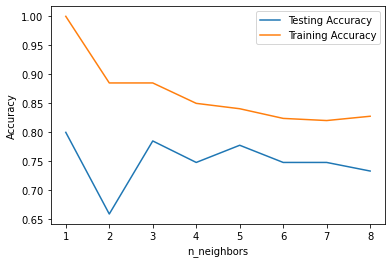

In [54]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()